### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

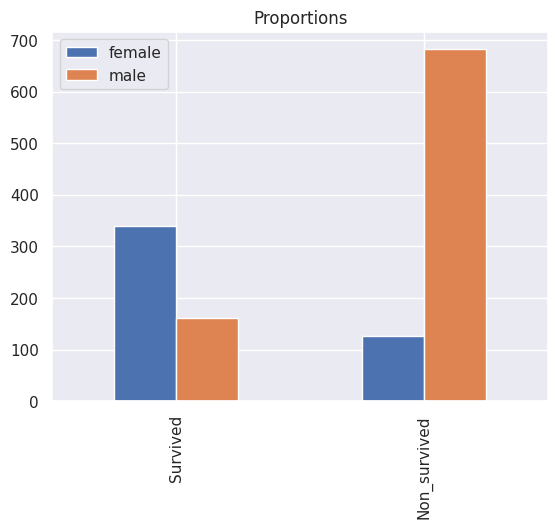

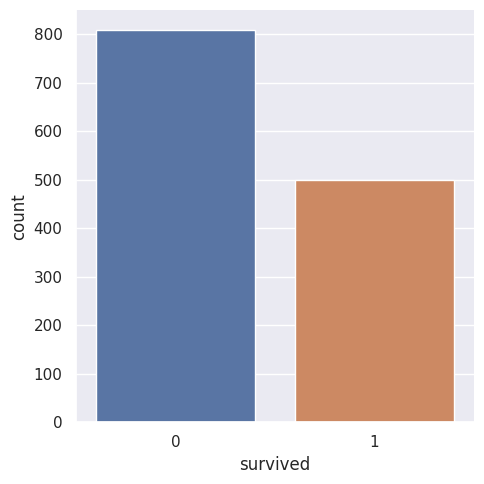

In [104]:
### write your code here. Load the dataset and plot (barplot) proportion of each class 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

#load the dataset
df = pd.read_csv('titanic.csv')

#function to barplot propotion while highlighting a given feature
def bar_chart(df, feature):
    positive = df[df['survived']==1][feature].value_counts()
    negative = df[df['survived']==0][feature].value_counts()
    df = pd.DataFrame([positive, negative])
    df.index=['Survived', 'Non_survived']
    df.plot(kind='bar', fig=(18,6), title="Proportions")

bar_chart(df, 'sex')
sns.catplot(kind='count', x='survived', data=df)

#### Preprocess the data as it has been done in the lab, feel free to adapt

In [105]:
from sklearn.model_selection import train_test_split

# removing name column
df = df.drop(['name'], axis = 1)

# find and print the proportion of positive samples in data
print('% of positive samples in whole data:', sum(data['survived'] == 1) / len(data)) #given that all survived field will be either 0 or 1 and won't have any NaN values

# split data
x_train, x_test, y_train, y_test = train_test_split(data.loc[:, 'pclass':], data['survived'],
                                                    test_size=0.2, stratify=data['survived'])

# find and print the proportion of positive samples in train and test sets, make sure they are approx same
print('% of positive samples in train set:', sum(y_train== 1) / len(x_train))
print('% of positive samples in test set:', sum(y_test== 1) / len(x_test))

% of positive samples in whole data: 0.4
% of positive samples in train set: 0.4
% of positive samples in test set: 0.4


In [106]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

def data_processing(x_train, x_test):
    # imputing missing values
    imputer = SimpleImputer(strategy='most_frequent')
    imputer.fit(x_train)
    x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
    x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

    # one-hot-encode categorical features
    def ohe_new_features(df, features_name, encoder):
        new_feats = encoder.transform(df[features_name])
        # create dataframe from encoded features with named columns
        new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
        new_df = pd.concat([df, new_cols], axis=1)    
        new_df.drop(features_name, axis=1, inplace=True)
        return new_df

    encoder = OneHotEncoder(sparse=False, drop='first')
    f_names = ['sex', 'embarked']
    encoder.fit(x_train[f_names])
    x_train = ohe_new_features(x_train, f_names, encoder)
    x_test = ohe_new_features(x_test, f_names, encoder)

    # feature scaling
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
    x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
    return x_train, x_test

## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

survived: 202
died: 809
0.9113300492610837 1.0 0.5609756097560976
survived: 346
died: 809
0.8744588744588745 0.8703703703703703 0.6811594202898551
survived: 539
died: 770
0.8129770992366412 0.7865168539325843 0.7


/home/iviosab/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/iviosab/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/iviosab/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/iviosab/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature

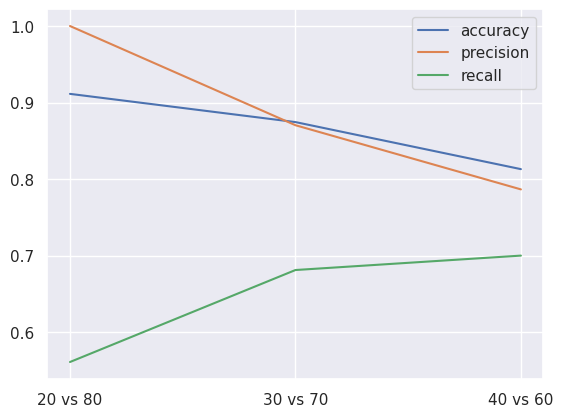

In [119]:
### write your code here 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
import numpy as np
accuracies = []
precisions = []
recalls = []
y_pred_counts = []
true_counts = []
def train_and_test(X,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, shuffle=True, random_state=0)
    x_train, x_test = data_processing(x_train, x_test)
    model = LogisticRegression().fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_counts.append(np.unique(y_pred, return_counts=True))
    true_counts.append(np.unique(y_test, return_counts=True))
    accuracy = metrics.accuracy_score(y_test,y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    print(accuracy, precision, recall)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
survived_rows = df[df['survived'] == 1]
died_rows = df[df['survived'] == 0]
precentages = [[0.2, 0.8], [0.3, 0.7], [0.4,0.6]]

for i in precentages:
    s = int((i[0]*len(died_rows))/i[1])
    data = pd.concat([survived_rows[:s], died_rows],axis=0)
    X = data.drop('survived',axis=1)
    y = data.survived
    print(f'survived: {s}')
    print(f'died: {len(X)-s}')
    train_and_test(X, y)
splits = ["20 vs 80", "30 vs 70", "40 vs 60"]
plt.plot(splits, accuracies, label = 'accuracy')   
plt.plot(splits, precisions, label = 'precision')   
plt.plot(splits, recalls, label = 'recall')
plt.legend()
plt.show()

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))
# clf.score(x_test, y_test)
# clf.classes_

ValueError: could not convert string to float: 'male'

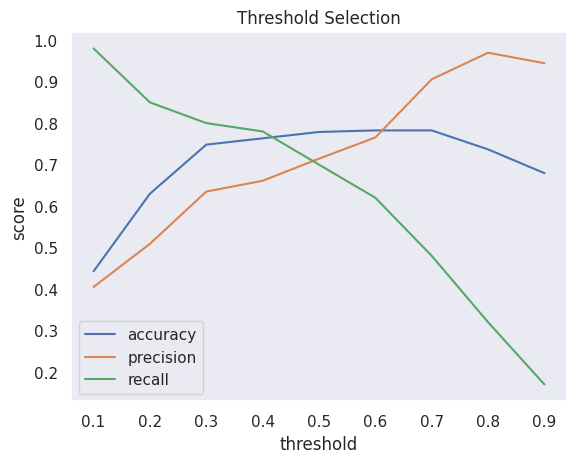

In [ ]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# calculate metrics for each threshold above and plot the result as below.
pred_proba = clf.predict_proba(x_test)
results = [[],[],[]]
for i in thresholds:
    y_test_pred_thr = np.where(pred_proba[:, 1] > i, 1, 0)
    results[0].append(metrics.accuracy_score(y_test, y_test_pred_thr))
    results[1].append(metrics.precision_score(y_test, y_test_pred_thr))
    results[2].append(metrics.recall_score(y_test, y_test_pred_thr))
    
plt.plot(thresholds, results[0], label = 'accuracy')   
plt.plot(thresholds, results[1], label = 'precision')   
plt.plot(thresholds, results[2], label = 'recall')
plt.title('Threshold Selection')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.grid()

## 3. Analyse the class-wise accuracy. 
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

In [ ]:
#### write your code 

## 4. Report 
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance 

`Write your report here`